In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import numpy as np
import math
import missingno as msno

In [45]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'  # 나눔고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [4]:
%matplotlib inline

In [5]:
warnings.filterwarnings("ignore")

In [6]:
path = './data/'

In [7]:
encodings = ['cp949', 'euc-kr', 'utf-8']

def get_df(name):
    for encoding in encodings:
        try:
            df = pd.read_csv(path + f'{name}', encoding=encoding)
            break
        except UnicodeDecodeError:
            continue
    return df

In [8]:
data = get_df('data.csv')

In [9]:
data.head()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.84030,59.7862,51.71690,...,0.450421,NaN,NaN,859.854,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.44150,61.6286,50.44530,...,0.450356,1.146260e-10,860.338,859.780,860.044,859.786,294.658,272.538,328.734,328.865
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.14600,68.4386,78.10990,61.5414,52.01960,...,0.450341,1.145200e-10,860.338,859.780,859.981,859.724,294.658,272.538,328.734,328.805
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.17675,68.4999,77.50725,60.6663,52.69425,...,0.450201,1.144670e-10,860.338,859.842,859.950,859.599,294.719,272.538,328.674,328.865
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.20750,68.4386,76.02620,61.1634,51.69150,...,0.450235,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808


In [10]:
data['TAG_MIN'] = pd.to_datetime(data['TAG_MIN'])

In [11]:
data['Year'] = data['TAG_MIN'].dt.year
data['Month'] = data['TAG_MIN'].dt.month
data['Day'] = data['TAG_MIN'].dt.day
data['Hour'] = data['TAG_MIN'].dt.hour
data['Minute'] = data['TAG_MIN'].dt.minute
data['Second'] = data['TAG_MIN'].dt.second

<Figure size 4000x2400 with 0 Axes>

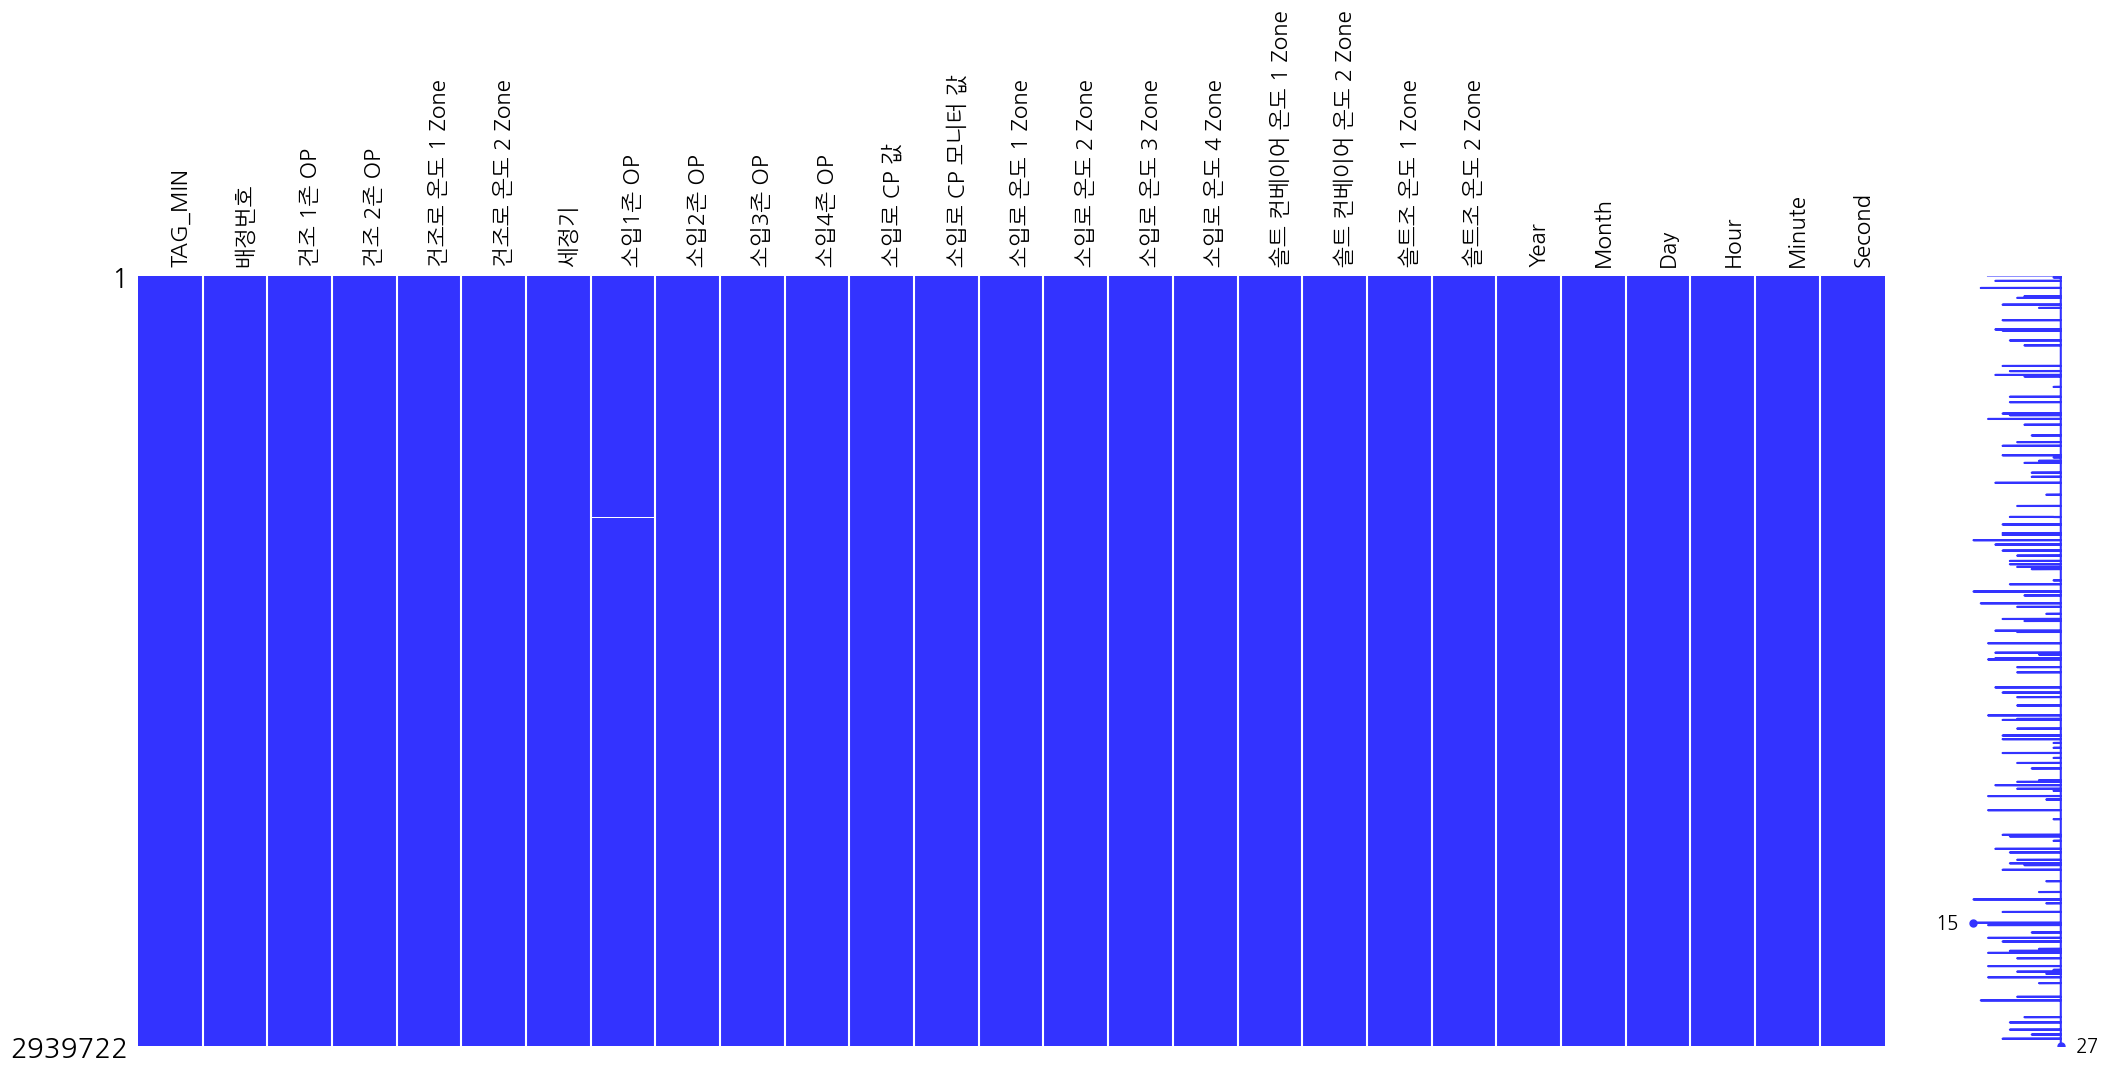

In [52]:
plt.figure(figsize=(10, 6), dpi=400)  # 그래프 크기와 고해상도 설정
msno.matrix(data, color=(0.2, 0.2, 1))  # msno.matrix를 사용하여 결측치 시각화

plt.xticks(rotation=90)  # x 축 레이블을 수직으로 회전

# 그래프 표시
plt.show()

### 결측치 처리

In [55]:
data.isnull().sum()

TAG_MIN                 0
배정번호                    0
건조 1존 OP                1
건조 2존 OP                1
건조로 온도 1 Zone         116
건조로 온도 2 Zone         148
세정기                    91
소입1존 OP              4288
소입2존 OP                 0
소입3존 OP                 2
소입4존 OP                 3
소입로 CP 값                1
소입로 CP 모니터 값          147
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
소입로 온도 3 Zone         157
소입로 온도 4 Zone         170
솔트 컨베이어 온도 1 Zone     106
솔트 컨베이어 온도 2 Zone     142
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
Year                    0
Month                   0
Day                     0
Hour                    0
Minute                  0
Second                  0
dtype: int64

In [56]:
data = data.fillna(data.mean())

<Figure size 4000x2400 with 0 Axes>

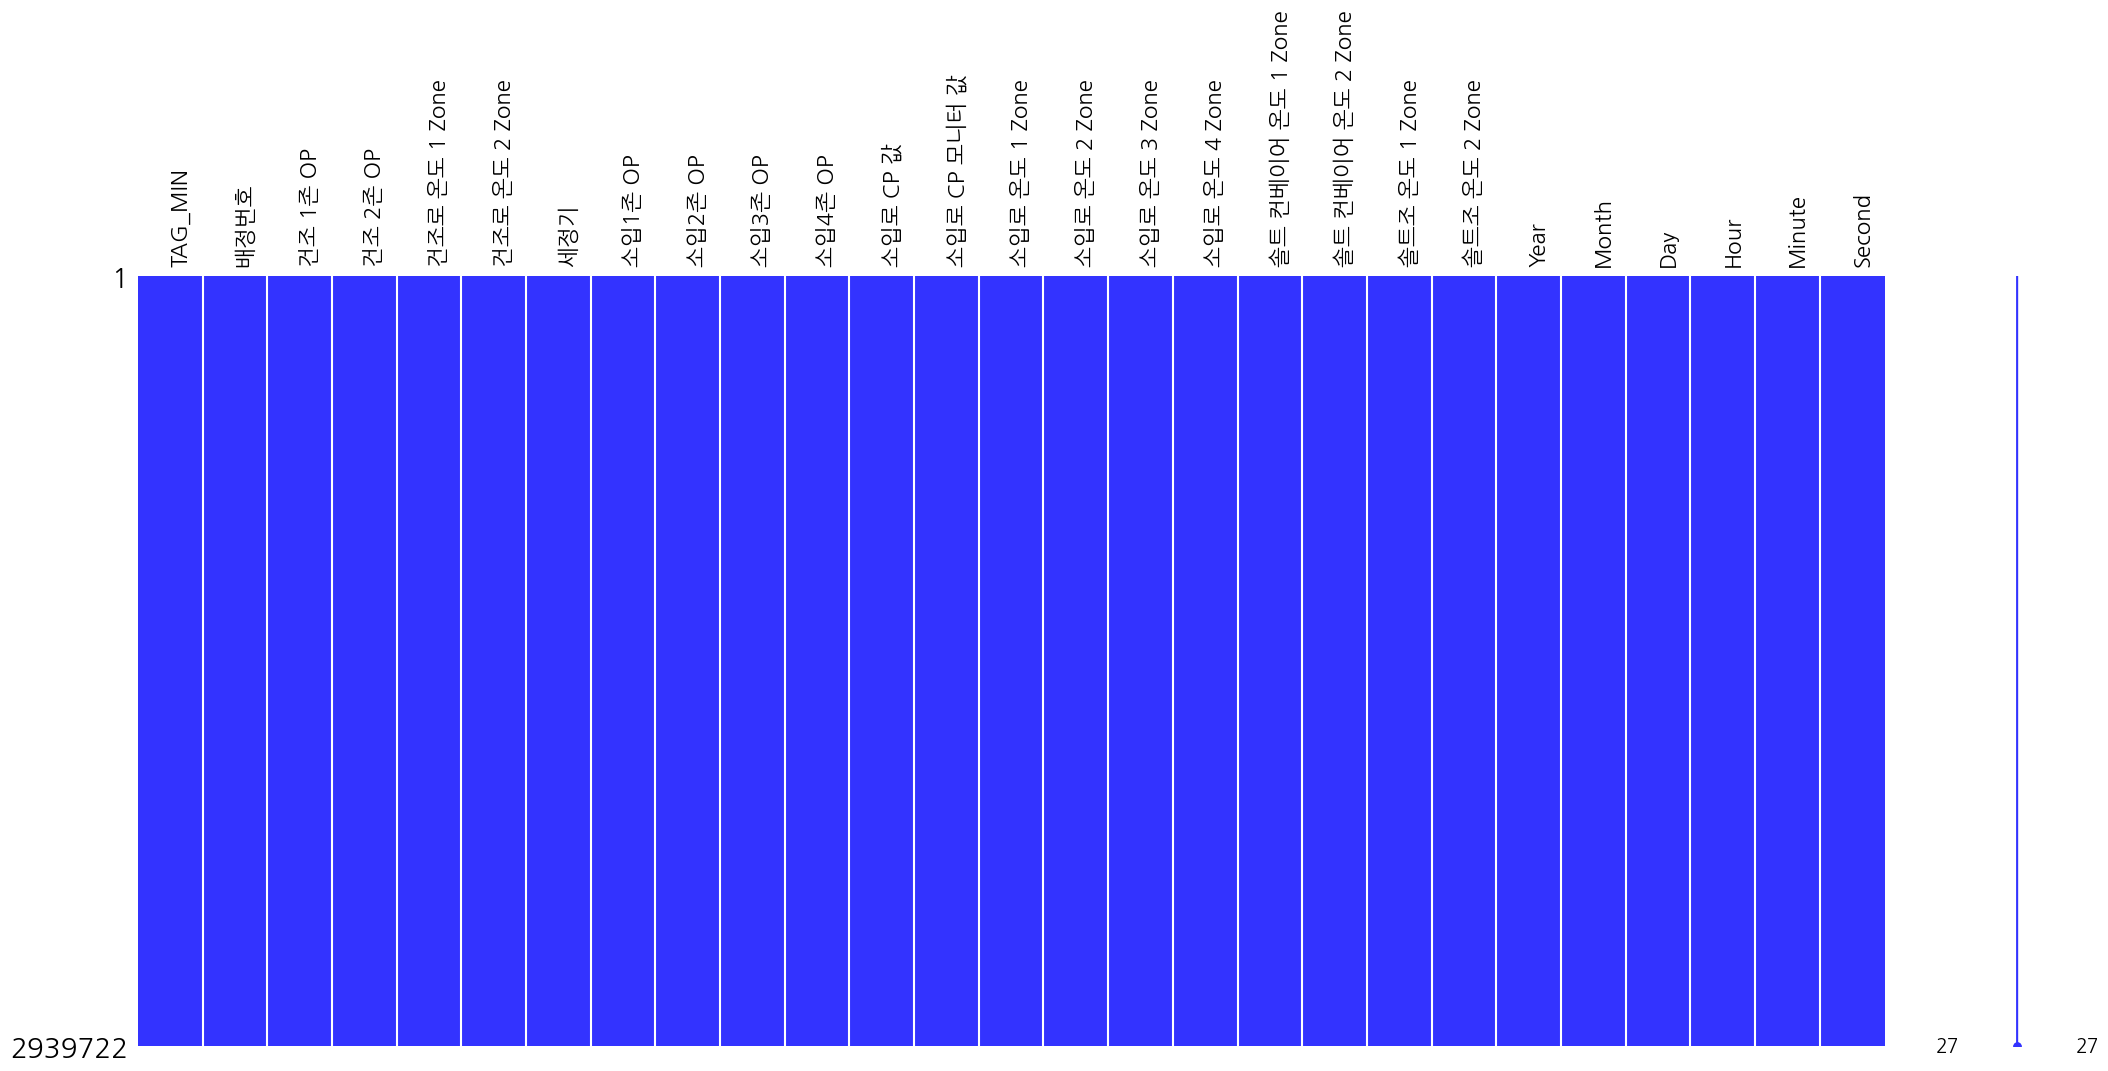

In [57]:
plt.figure(figsize=(10, 6), dpi=400)  # 그래프 크기와 고해상도 설정
msno.matrix(data, color=(0.2, 0.2, 1))  # msno.matrix를 사용하여 결측치 시각화

plt.xticks(rotation=90)  # x 축 레이블을 수직으로 회전

# 그래프 표시
plt.show()